# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats as stats

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

In [7]:
df= pd.read_csv("Titanic-Dataset.csv")

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#Pandas frofiling
from pandas_profiling import ProfileReport
prof=ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
import klib


Shape of your Data Set loaded: (891, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
PassengerId,891,int64,0,0.000000,100.000000,0,possible ID column: drop
Name,891,object,0,0.000000,100.000000,1,"combine rare categories, possible ID column: drop"
Ticket,681,object,0,0.000000,76.430976,1,combine rare categories
Fare,248,float64,0,0.000000,27.833895,0,skewed: cap or drop outliers
Cabin,147,object,687,77.104377,16.498316,1,"combine rare categories, fill missing, fix mixed data types"
Age,88,float64,177,19.865320,9.876543,0,fill missing
SibSp,7,int64,0,0.000000,0.785634,0,
Parch,7,int64,0,0.000000,0.785634,0,
Pclass,3,int64,0,0.000000,0.336700,0,
Embarked,3,object,2,0.224467,0.336700,77,"fill missing, fix mixed data types"


    12 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['PassengerId']
Number of All Scatter Plots = 3


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Shailesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Shailesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Shailesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Shailesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Shailesh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\Shailesh\

All Plots done
Time to run AutoViz = 99 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


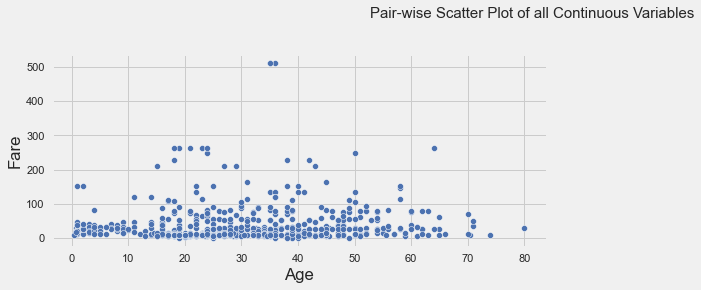

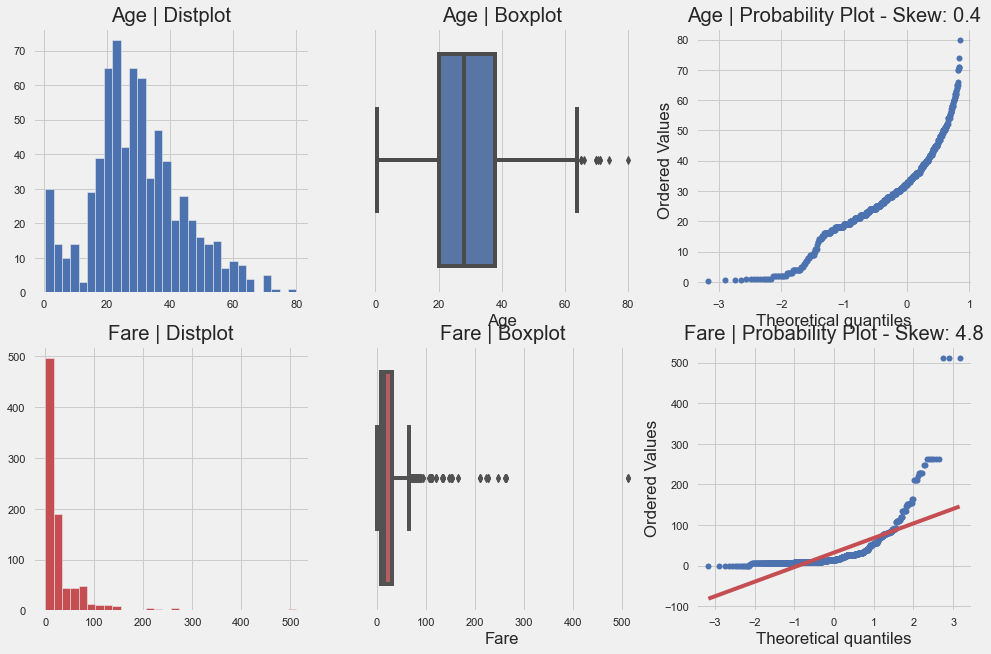

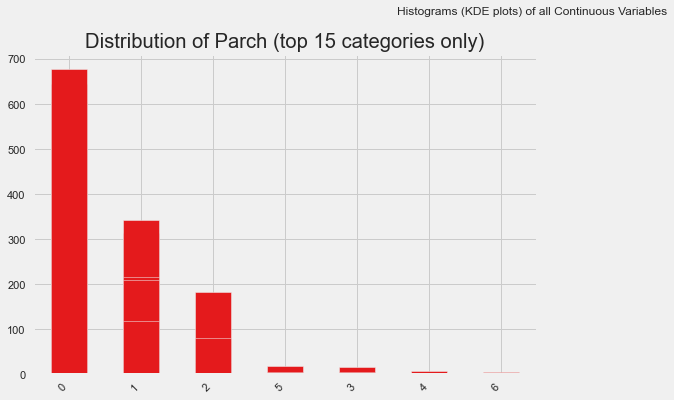

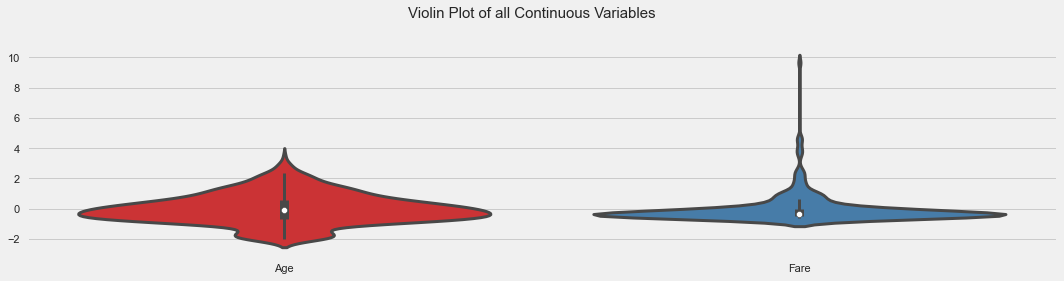

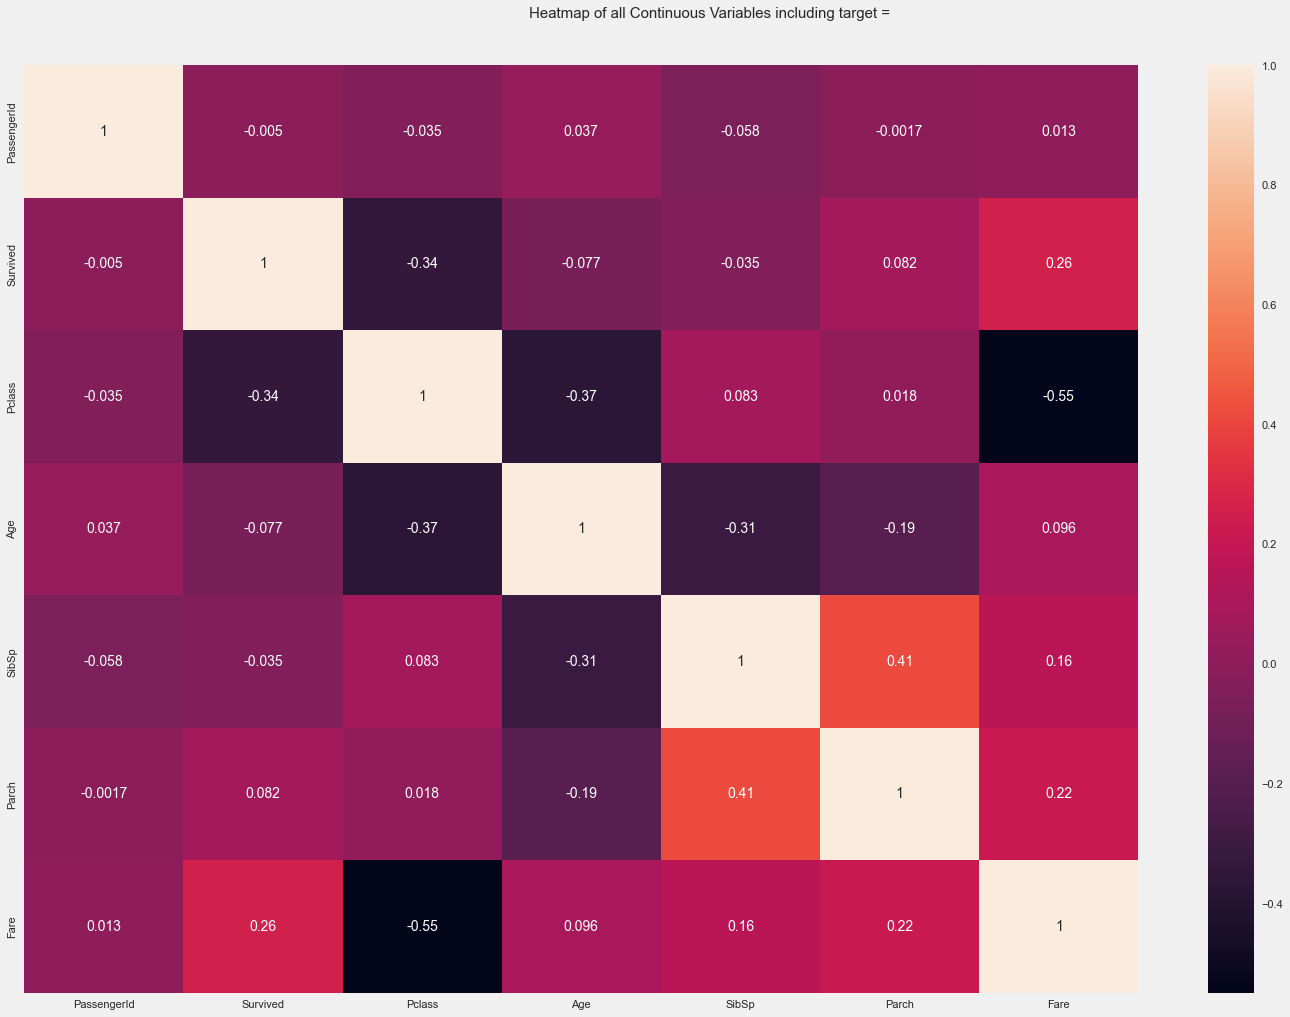

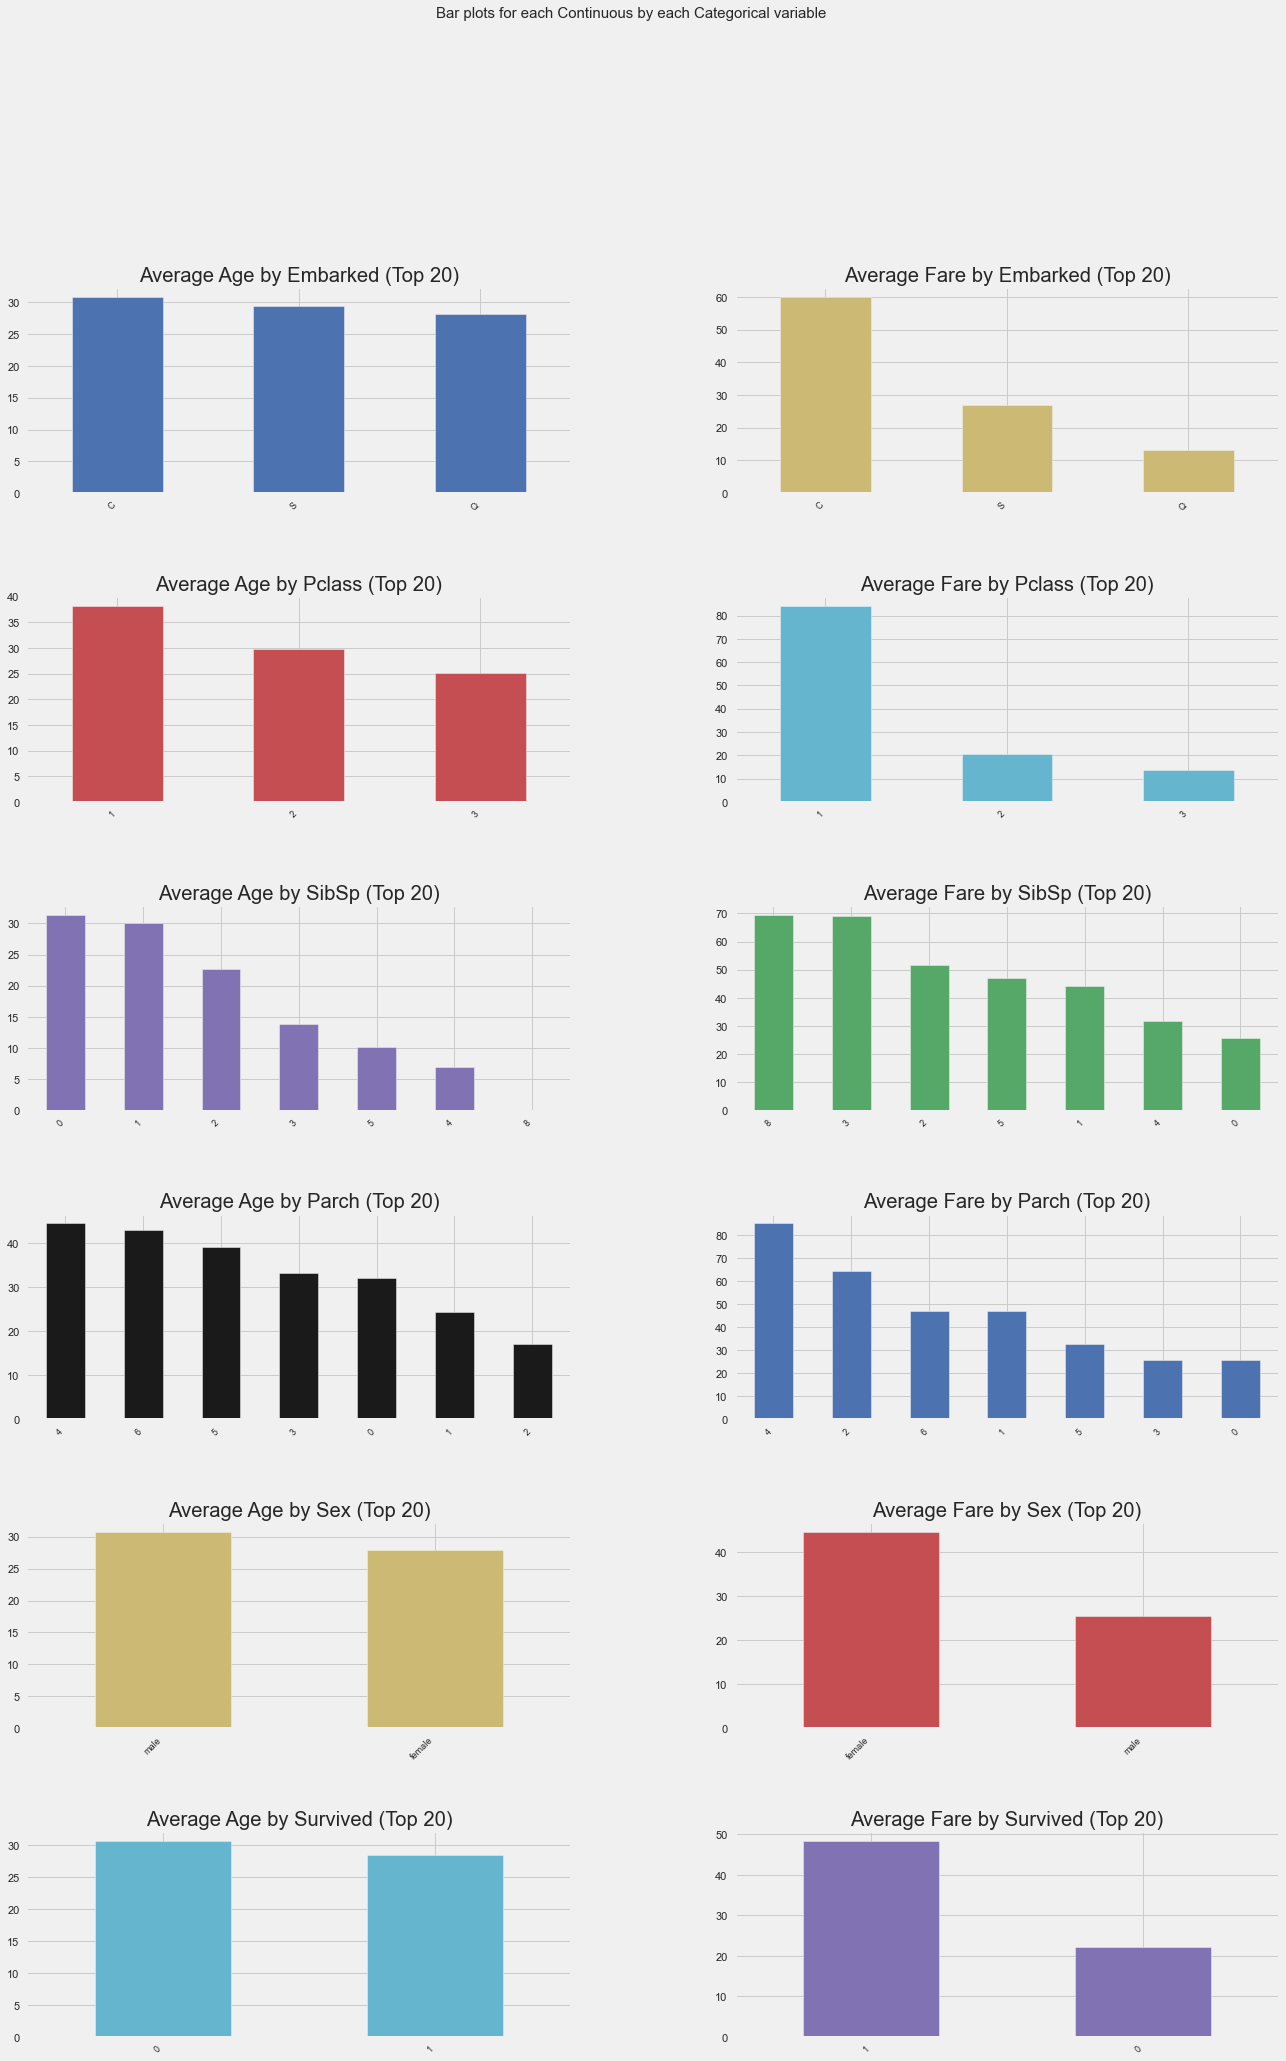

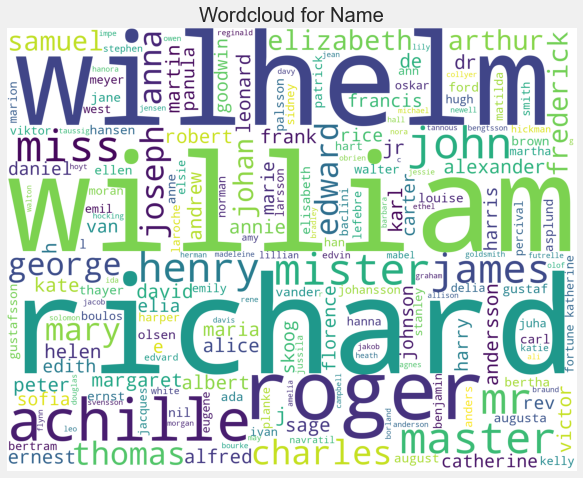

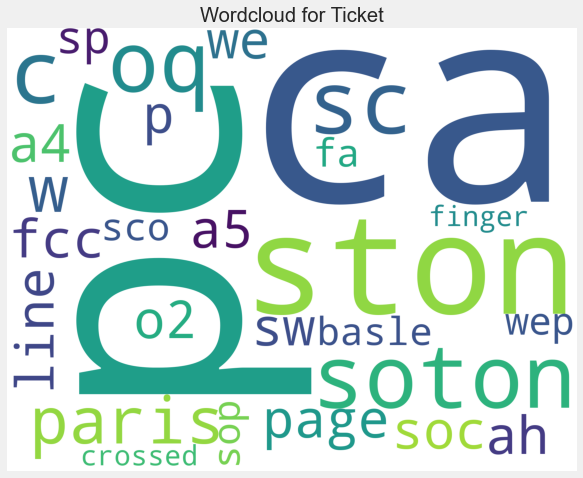

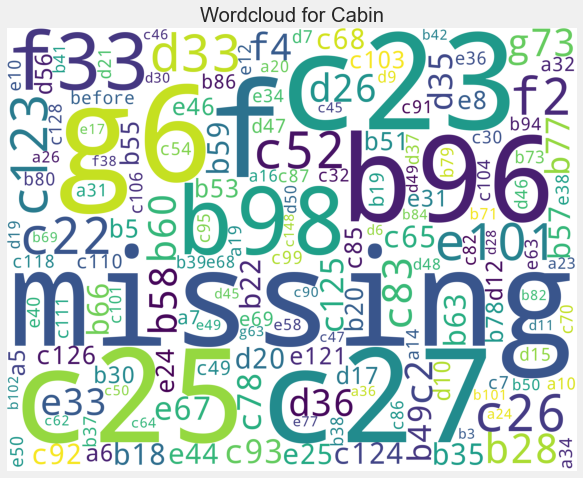

In [14]:
from autoviz.AutoViz_Class import AutoViz_Class
Av=AutoViz_Class()
file="Titanic-Dataset.csv"
dft=Av.AutoViz(file)

In [6]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [7]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


KeyError: 'age'

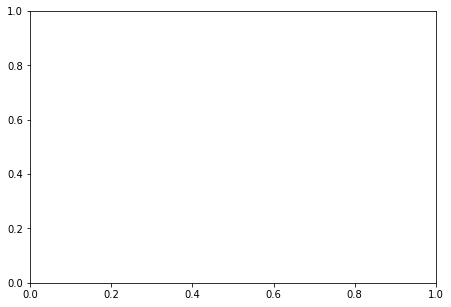

In [13]:

plt.figure(figsize=(16,4))
plt.subplot(121)
sns.displot(X_train['Age'])
plt.title('Age of PDf')


plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age of Q-Q plot')



plt.show()


In [11]:
#train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['Survived']),
                df['Survived'],
                test_size=0.2,
                                               
                )

In [18]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
878,3,male,NaN,0,0,7.8958,S
769,3,male,32.0,0,0,8.3625,S
540,1,female,36.0,0,2,71.0000,S
114,3,female,17.0,0,0,14.4583,C
277,2,male,NaN,0,0,0.0000,S


In [14]:
y_train.sample()

811    0
Name: Survived, dtype: int64

In [16]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

# Column transformer

In [19]:
#imputation transformer
trf1=ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')

In [20]:
#One Hot Encoding
trf2=ColumnTransformer([
    ('onh_sex_embarked',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,6])
    ],remainder='passthrough')

In [21]:
#Scalling
trf3=ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])

In [22]:
#Feature selection
trf4=SelectKBest(score_func=chi2,k=8)

In [23]:
#train the model
#trf5=DecisionTreeClassifier()
trf5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0)

# Create pipeline

In [24]:
pipe=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5),
])

In [25]:
#train
pipe.fit(X_train,y_train)


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),


# Explore the pipeline


In [26]:
pipe.steps

[('trf1',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('impute_age', SimpleImputer(), [2]),
                                  ('impute_embarked',
                                   SimpleImputer(strategy='most_frequent'),
                                   [6])])),
 ('trf2',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('onh_sex_embarked',
                                   OneHotEncoder(handle_unknown='ignore',
                                                 sparse=False),
                                   [1, 6])])),
 ('trf3',
  ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))])),
 ('trf4', SelectKBest(k=8, score_func=<function chi2 at 0x000001C0C8AD9A60>)),
 ('trf5',
  GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0))]

In [27]:
#Display pipeline
from sklearn import set_config
set_config(display='diagram')

In [28]:
#predict
y_pred=pipe.predict(X_test)

In [29]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.664804469273743

# Cross validation using pipeline

In [30]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy').mean()

0.6292524377031419

# Gridsearch using pipline

In [31]:
#gridserach_cv
params={
    'trf5__max_depth':[1,2,3,4,5,None]
}


In [32]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(pipe,params,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onh_sex_embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x000001C0C8AD9A60>)),
                                       ('trf5',
                                        GradientBoostingClassifier(learning_rate=1.0,
                                                                   max_depth=1,
                                                                   random_state=0))]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [33]:
grid.best_score_

0.6292524377031419

In [34]:
grid.best_params_

{'trf5__max_depth': 1}

# Exporting the Pipeline

In [87]:
#export
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))